In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 2
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="DictColTable")

Xm = Tables.matrix(X)

50×2 Matrix{Float64}:
 0.393855   0.811215
 0.177386   0.352722
 0.0660626  0.119713
 0.621281   0.27611
 0.328478   0.46458
 0.513065   0.744747
 0.750074   0.737962
 0.323956   0.101683
 0.842742   0.85722
 0.581786   0.703487
 ⋮          
 0.429093   0.809586
 0.439122   0.816981
 0.0150618  0.390918
 0.209684   0.443947
 0.182732   0.853245
 0.435703   0.562369
 0.356335   0.0942252
 0.62909    0.717794
 0.241224   0.435383

### 2. Apply ROSE

In [3]:
Xover, yover = rose(Xm, y; ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng)

([0.3938551729824016 0.8112148296243791; 0.17738588633384345 0.352721563506877; … ; 0.525809141082528 0.5875696111467853; 0.5126363784450021 0.6032171530034295], CategoricalValue{Int64, UInt32}[0, 2, 0, 0, 2, 1, 1, 2, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

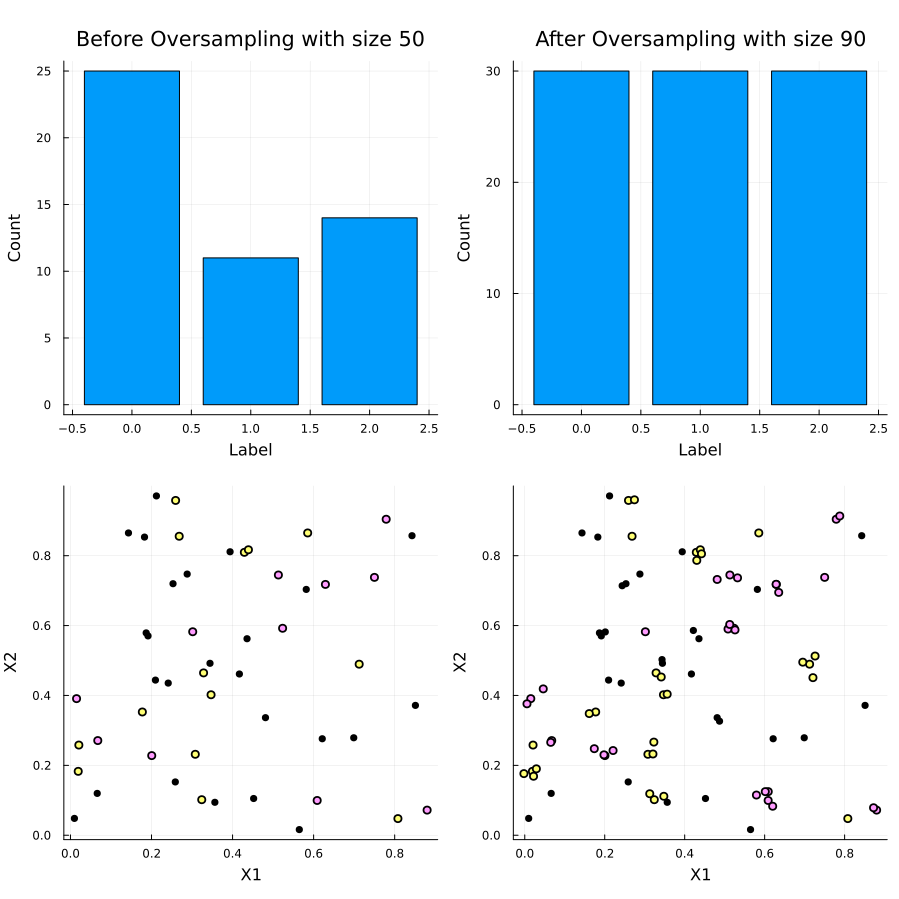

In [4]:
plot_data(y, yover, X, Xover)